In [2]:
!pip install streamlit pandas numpy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 52.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 104.0 MB/s eta 0:00:00


--- Salary Expectation Analysis ---
count       975.000000
mean      95998.410256
std       28916.798634
min       45184.000000
25%       70418.000000
50%       97977.000000
75%      121246.000000
max      144966.000000
Name: salary_expectation, dtype: float64


Saved salary distribution plot to salary_distribution.png
--- Top 15 Most Common Skills ---
                  Skill  Count
0                  Java    294
1                Python    272
2                   SQL    256
3                 React    198
4            JavaScript    181
5              HTML/CSS    150
6               Node JS    125
7   Amazon Web Services    116
8               Angular    113
9             REST APIs    111
10               Docker    110
11                  PHP     98
12           TypeScript     94
13              MongoDB     91
14                Agile     88




/tmp/ipython-input-777781389.py:110: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Skill', data=skill_df, palette='viridis')


Saved top skills plot to top_skills.png
--- Top 10 Candidate Locations ---
location
United States    126
Brazil            93
Argentina         35
Canada            33
Pakistan          16
São Paulo         15
Bangladesh        14
Mexico            12
Not Specified     12
Germany           11
Name: count, dtype: int64




/tmp/ipython-input-777781389.py:125: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_locations.values, y=top_locations.index, palette='plasma')


Saved top locations plot to top_locations.png
--- Distribution of Education Levels ---
highest_education
Bachelor's Degree      534
Master's Degree        271
Associate's Degree      59
Not Specified           55
Doctorate               30
High School Diploma     14
Juris Doctor (J.D)      12
Name: count, dtype: int64




/tmp/ipython-input-777781389.py:140: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=education_counts.values, y=education_counts.index, palette='magma')


Saved education distribution plot to education_distribution.png
--- Top 15 Most Common Previous Roles ---
                         Role  Count
0          Software Developer    298
1           Software Engineer    278
2        Full Stack Developer    200
3    Senior Software Engineer    191
4                  Consultant    166
5   Software Developer Intern    148
6             Project Manager     98
7           Financial Analyst     91
8               Web Developer     89
9                      Writer     78
10          Frontend Engineer     74
11                 Researcher     74
12       Marketing Specialist     65
13             Data Scientist     59
14     Operational Specialist     56


/tmp/ipython-input-777781389.py:157: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Role', data=role_df, palette='cividis')


Saved top roles plot to top_roles.png


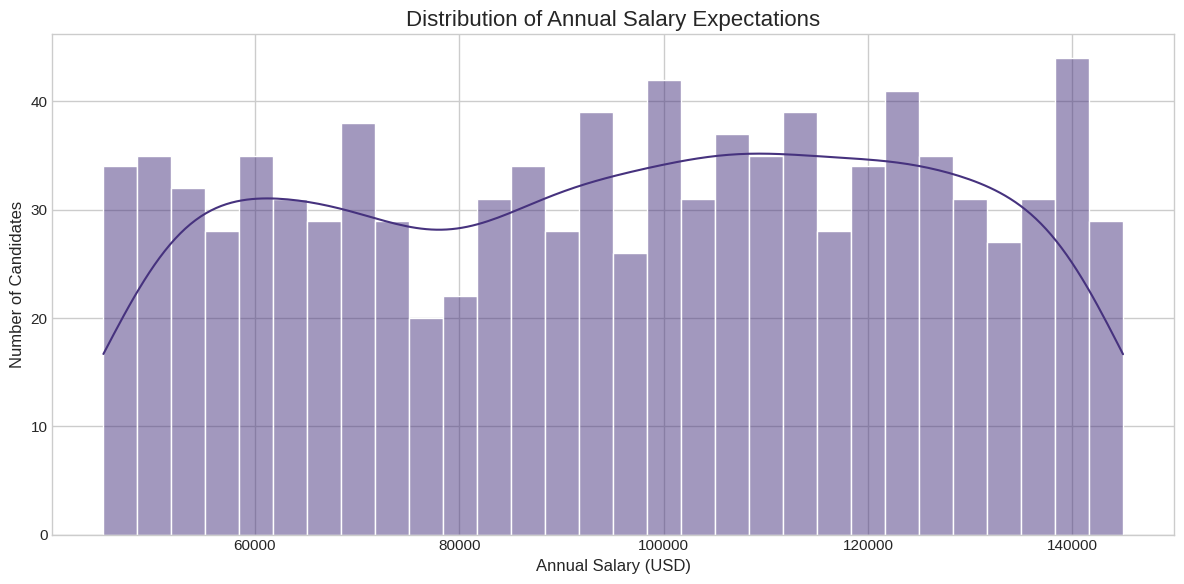

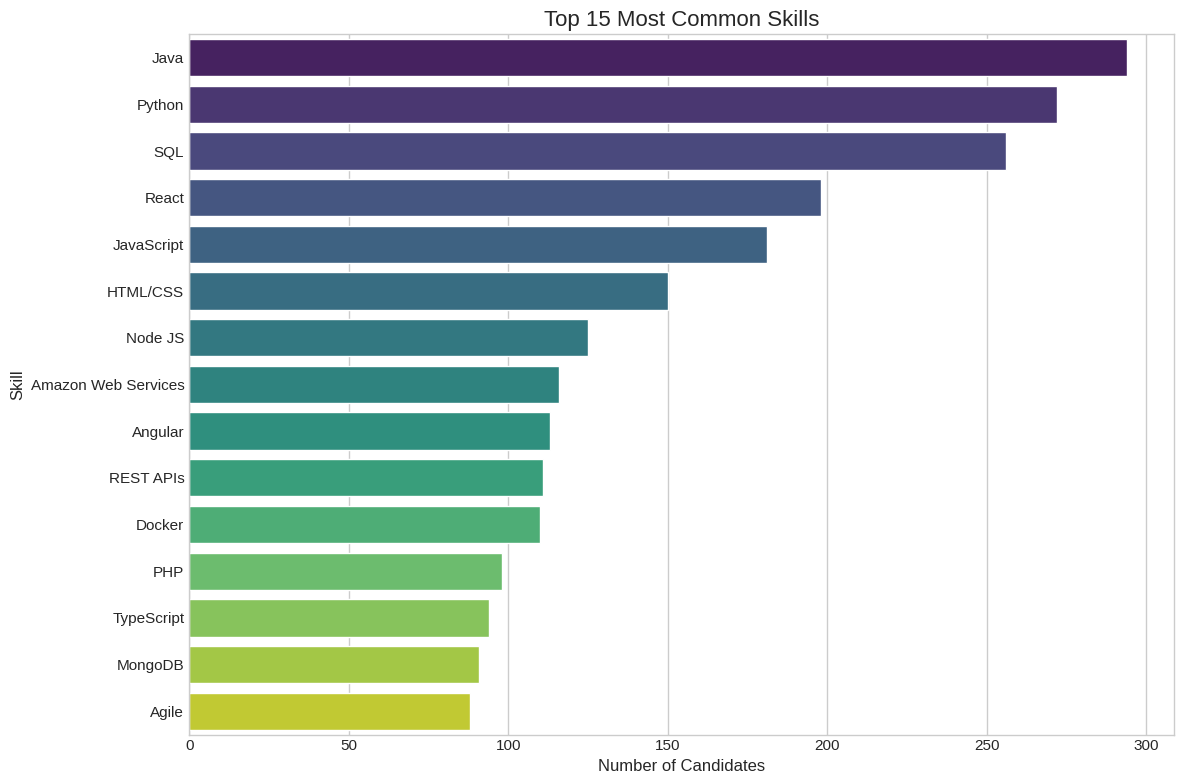

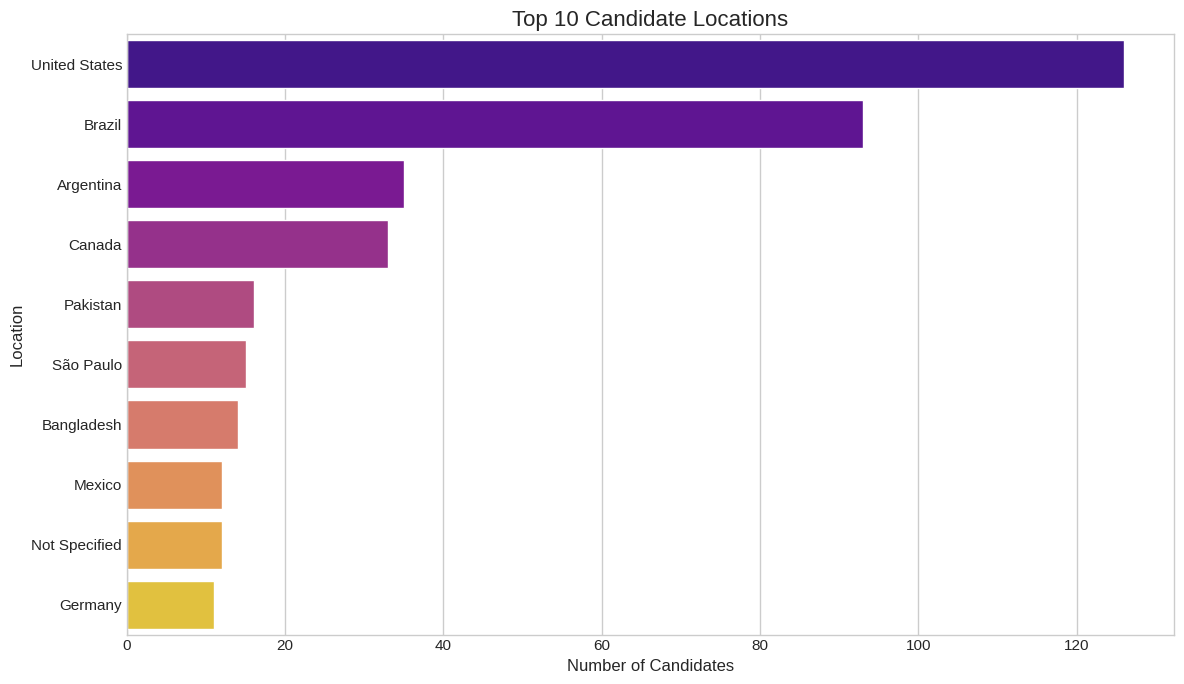

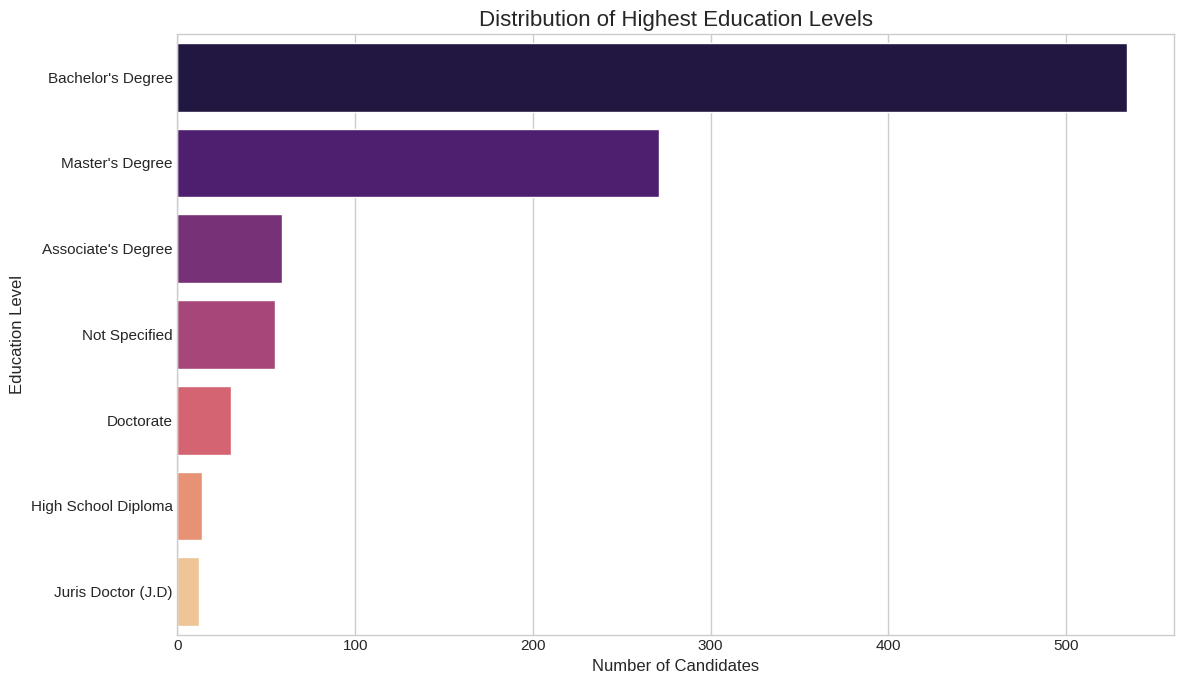

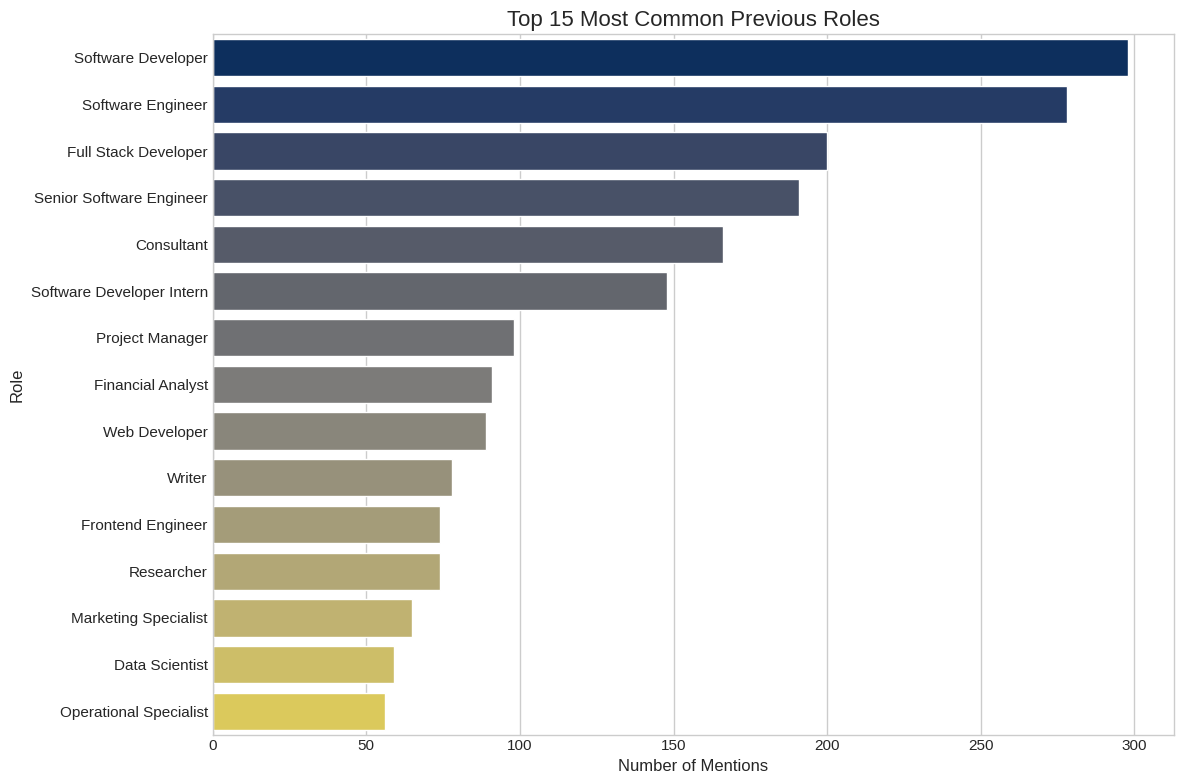

In [4]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import numpy as np

# --- Configuration ---
# Set styles for plots for better aesthetics
sns.set_theme(style="whitegrid", palette="viridis")
plt.style.use('seaborn-v0_8-whitegrid')

# --- Data Loading and Cleaning Function ---
def load_and_clean_data(filepath):
    """
    Loads candidate data from a JSON file, cleans it, and structures it into a pandas DataFrame.

    Args:
        filepath (str): The path to the form-submissions.json file.

    Returns:
        pandas.DataFrame: A cleaned and structured DataFrame of candidate data.
    """
    try:
        with open(filepath, 'r', encoding='utf-8') as f:
            data = json.load(f)
    except FileNotFoundError:
        print(f"Error: The file {filepath} was not found.")
        return pd.DataFrame()
    except json.JSONDecodeError:
        print(f"Error: The file {filepath} is not a valid JSON file.")
        return pd.DataFrame()

    # --- Data Extraction and Structuring ---
    # We will flatten the nested JSON structure to make it easier to analyze with pandas.
    processed_records = []
    for record in data:
        # Extract salary, handling missing values and converting to a number
        salary_str = record.get('annual_salary_expectation', {}).get('full-time')
        salary = None
        if salary_str:
            try:
                # Remove '$' and ',' and convert to integer
                salary = int(salary_str.replace('$', '').replace(',', ''))
            except (ValueError, TypeError):
                salary = None # Keep as None if conversion fails

        # Extract highest education level
        highest_education = record.get('education', {}).get('highest_level', 'Not Specified')
        if not highest_education: # Handle empty strings
             highest_education = 'Not Specified'

        # Extract all roles from work experience
        work_experiences = record.get('work_experiences', [])
        roles = [exp['roleName'] for exp in work_experiences if 'roleName' in exp and exp['roleName']] if work_experiences else []

        processed_records.append({
            'name': record.get('name', 'Unnamed'),
            'location': record.get('location', 'Not Specified') or 'Not Specified',
            'salary_expectation': salary,
            'highest_education': highest_education,
            'skills': record.get('skills', []),
            'roles': roles
        })

    df = pd.DataFrame(processed_records)
    # Drop rows where salary is not specified for a more accurate salary analysis
    df.dropna(subset=['salary_expectation'], inplace=True)
    df['salary_expectation'] = df['salary_expectation'].astype(int)

    return df

# --- Analysis and Visualization Functions ---

def analyze_and_visualize(df):
    """
    Performs data analysis and generates visualizations for key insights.

    Args:
        df (pandas.DataFrame): The DataFrame containing cleaned candidate data.
    """
    if df.empty:
        print("DataFrame is empty. Cannot perform analysis.")
        return

    # --- 1. Salary Analysis ---
    print("--- Salary Expectation Analysis ---")
    print(df['salary_expectation'].describe())
    print("\n")

    plt.figure(figsize=(12, 6))
    sns.histplot(df['salary_expectation'], bins=30, kde=True)
    plt.title('Distribution of Annual Salary Expectations', fontsize=16)
    plt.xlabel('Annual Salary (USD)', fontsize=12)
    plt.ylabel('Number of Candidates', fontsize=12)
    plt.tight_layout()
    plt.savefig('salary_distribution.png')
    print("Saved salary distribution plot to salary_distribution.png")

    # --- 2. Skills Analysis ---
    print("--- Top 15 Most Common Skills ---")
    all_skills = [skill for sublist in df['skills'] for skill in sublist]
    skills_counter = Counter(all_skills)
    top_skills = skills_counter.most_common(15)
    print(pd.DataFrame(top_skills, columns=['Skill', 'Count']))
    print("\n")

    plt.figure(figsize=(12, 8))
    skill_df = pd.DataFrame(top_skills, columns=['Skill', 'Count'])
    sns.barplot(x='Count', y='Skill', data=skill_df, palette='viridis')
    plt.title('Top 15 Most Common Skills', fontsize=16)
    plt.xlabel('Number of Candidates', fontsize=12)
    plt.ylabel('Skill', fontsize=12)
    plt.tight_layout()
    plt.savefig('top_skills.png')
    print("Saved top skills plot to top_skills.png")

    # --- 3. Location Analysis ---
    print("--- Top 10 Candidate Locations ---")
    top_locations = df['location'].value_counts().nlargest(10)
    print(top_locations)
    print("\n")

    plt.figure(figsize=(12, 7))
    sns.barplot(x=top_locations.values, y=top_locations.index, palette='plasma')
    plt.title('Top 10 Candidate Locations', fontsize=16)
    plt.xlabel('Number of Candidates', fontsize=12)
    plt.ylabel('Location', fontsize=12)
    plt.tight_layout()
    plt.savefig('top_locations.png')
    print("Saved top locations plot to top_locations.png")

    # --- 4. Education Level Analysis ---
    print("--- Distribution of Education Levels ---")
    education_counts = df['highest_education'].value_counts()
    print(education_counts)
    print("\n")

    plt.figure(figsize=(12, 7))
    sns.barplot(x=education_counts.values, y=education_counts.index, palette='magma')
    plt.title('Distribution of Highest Education Levels', fontsize=16)
    plt.xlabel('Number of Candidates', fontsize=12)
    plt.ylabel('Education Level', fontsize=12)
    plt.tight_layout()
    plt.savefig('education_distribution.png')
    print("Saved education distribution plot to education_distribution.png")

    # --- 5. Role Analysis ---
    print("--- Top 15 Most Common Previous Roles ---")
    all_roles = [role for sublist in df['roles'] for role in sublist]
    roles_counter = Counter(all_roles)
    top_roles = roles_counter.most_common(15)
    print(pd.DataFrame(top_roles, columns=['Role', 'Count']))

    plt.figure(figsize=(12, 8))
    role_df = pd.DataFrame(top_roles, columns=['Role', 'Count'])
    sns.barplot(x='Count', y='Role', data=role_df, palette='cividis')
    plt.title('Top 15 Most Common Previous Roles', fontsize=16)
    plt.xlabel('Number of Mentions', fontsize=12)
    plt.ylabel('Role', fontsize=12)
    plt.tight_layout()
    plt.savefig('top_roles.png')
    print("Saved top roles plot to top_roles.png")


# --- Main Execution Block ---
if __name__ == "__main__":
    FILE_PATH = 'form-submissions.json'
    candidate_df = load_and_clean_data(FILE_PATH)

    if not candidate_df.empty:
        analyze_and_visualize(candidate_df)
        # Show all plots at the end
        plt.show()


--- Salary Expectation Analysis ---
count       975.000000
mean      95998.410256
std       28916.798634
min       45184.000000
25%       70418.000000
50%       97977.000000
75%      121246.000000
max      144966.000000
Name: salary_expectation, dtype: float64


Saved salary distribution plot to salary_distribution.png
--- Top 15 Most Common Skills ---
                  Skill  Count
0                  Java    294
1                Python    272
2                   SQL    256
3                 React    198
4            JavaScript    181
5              HTML/CSS    150
6               Node JS    125
7   Amazon Web Services    116
8               Angular    113
9             REST APIs    111
10               Docker    110
11                  PHP     98
12           TypeScript     94
13              MongoDB     91
14                Agile     88


Saved top skills plot to top_skills.png
--- Top 10 Candidate Locations ---
location
United States    126
Brazil            93
Argentina         35


/tmp/ipython-input-2889608496.py:125: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_locations.values, y=top_locations.index, palette='plasma')


Saved top locations plot to top_locations.png
--- Distribution of Education Levels ---
highest_education
Bachelor's Degree      534
Master's Degree        271
Associate's Degree      59
Not Specified           55
Doctorate               30
High School Diploma     14
Juris Doctor (J.D)      12
Name: count, dtype: int64




/tmp/ipython-input-2889608496.py:140: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=education_counts.values, y=education_counts.index, palette='magma')


Saved education distribution plot to education_distribution.png
--- Top 15 Most Common Previous Roles ---
                         Role  Count
0          Software Developer    298
1           Software Engineer    278
2        Full Stack Developer    200
3    Senior Software Engineer    191
4                  Consultant    166
5   Software Developer Intern    148
6             Project Manager     98
7           Financial Analyst     91
8               Web Developer     89
9                      Writer     78
10          Frontend Engineer     74
11                 Researcher     74
12       Marketing Specialist     65
13             Data Scientist     59
14     Operational Specialist     56


/tmp/ipython-input-2889608496.py:157: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Role', data=role_df, palette='cividis')


Saved top roles plot to top_roles.png

--- Salary Expectation by Education Level ---


/tmp/ipython-input-2889608496.py:172: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='highest_education', y='salary_expectation', data=df, palette='rocket', order=education_order)


Saved salary by education plot to salary_by_education.png

--- Salary Expectation by Top 5 Locations ---


/tmp/ipython-input-2889608496.py:186: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='location', y='salary_expectation', data=df_top_locations, palette='crest')


Saved salary by location plot to salary_by_location.png

--- Salary Expectation by Top 5 Roles ---


/tmp/ipython-input-2889608496.py:201: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='roles', y='salary_expectation', data=df_top_roles, palette='flare')


Saved salary by role plot to salary_by_role.png

Displaying all generated plots...


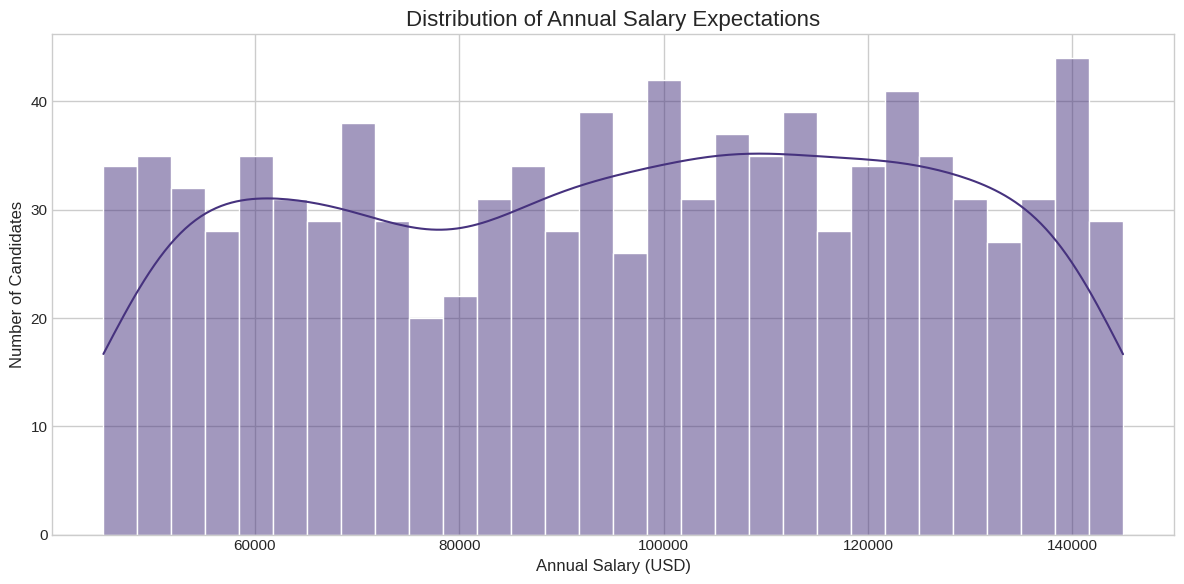

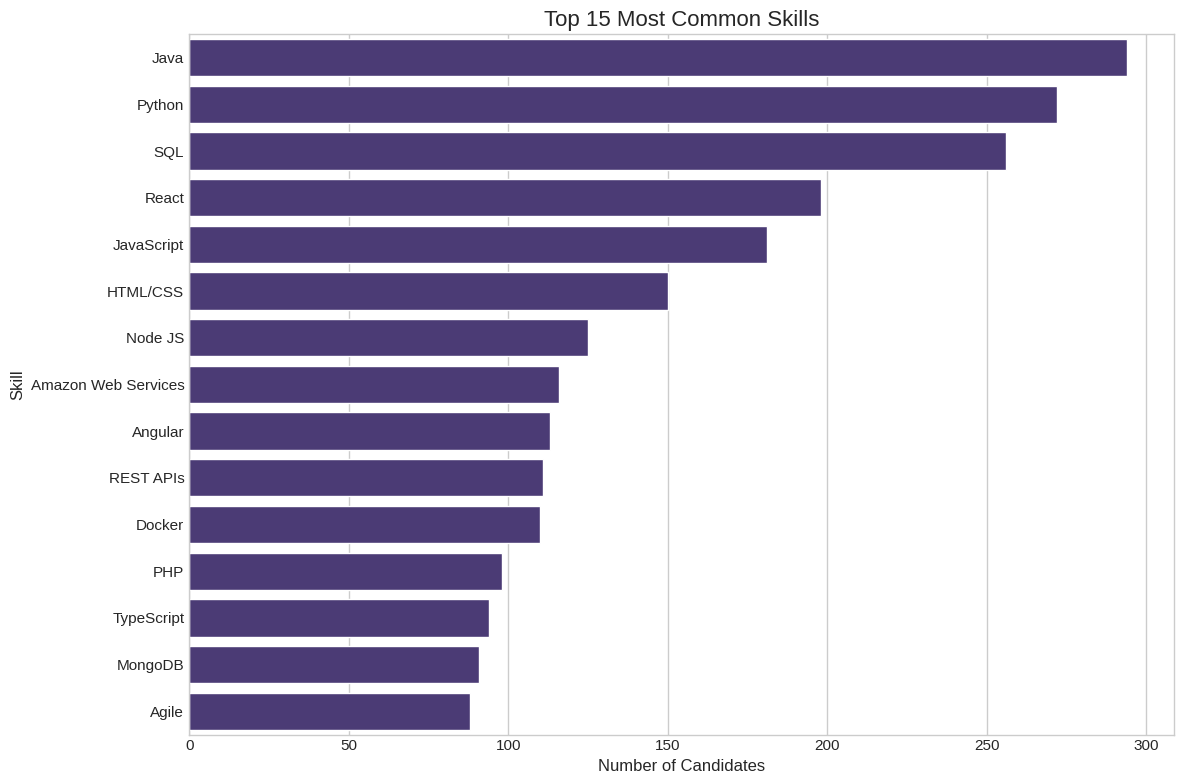

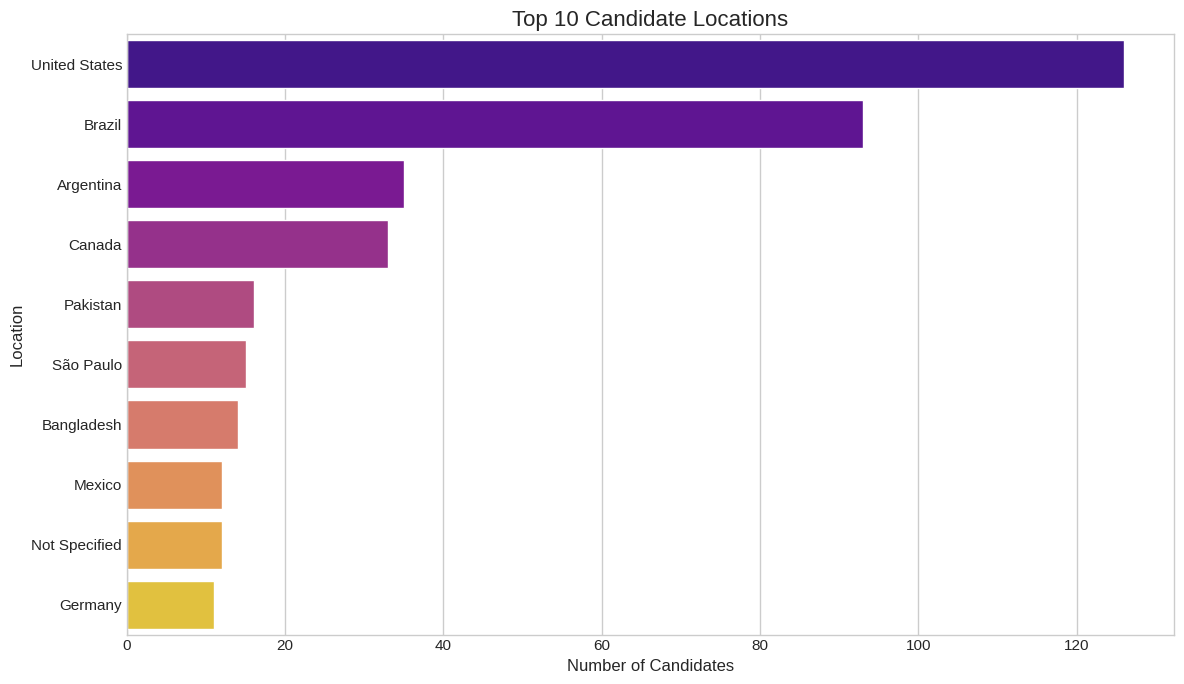

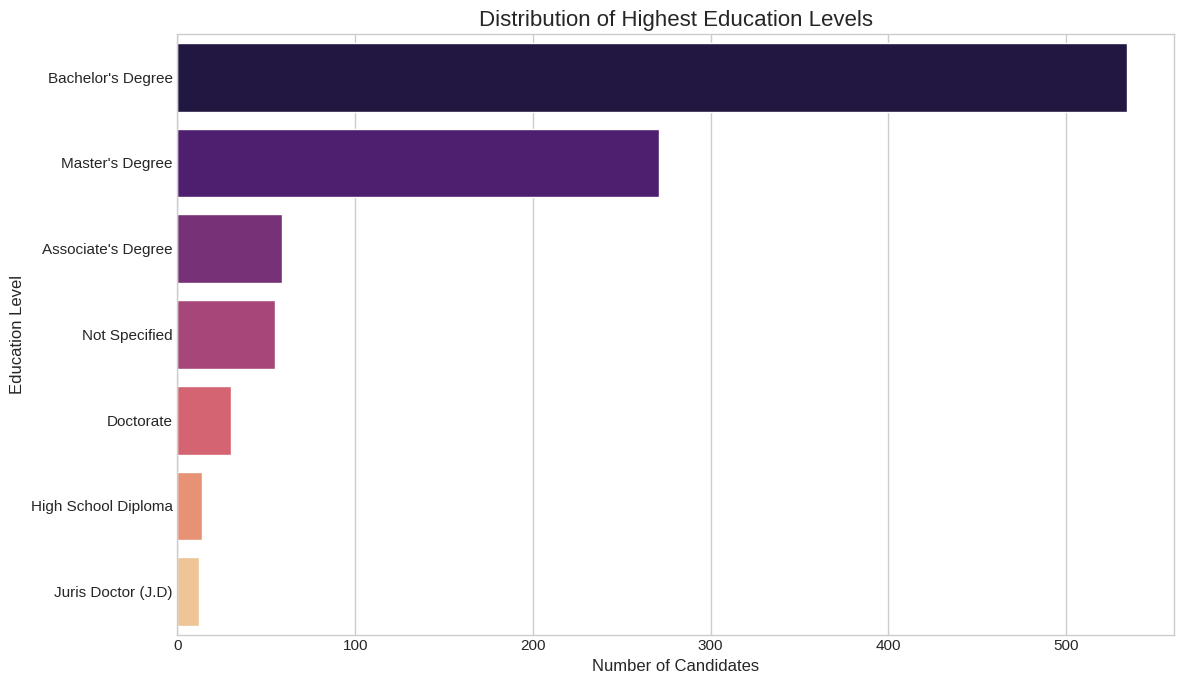

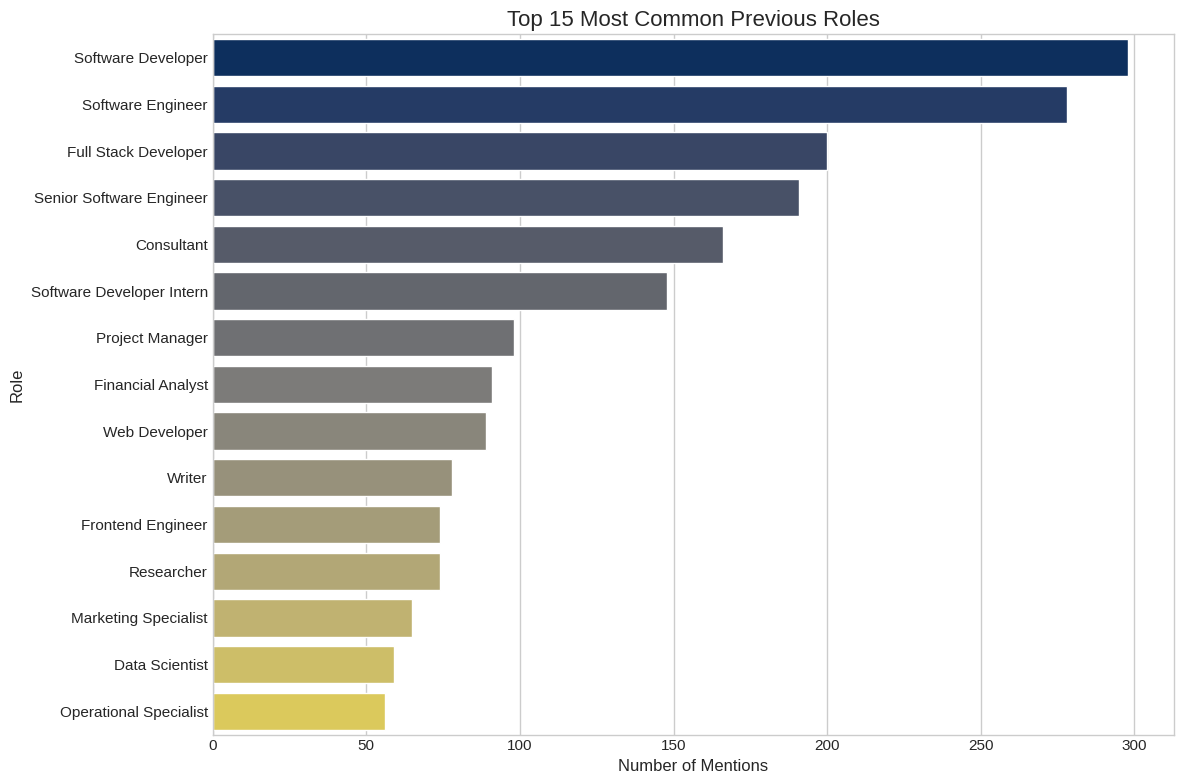

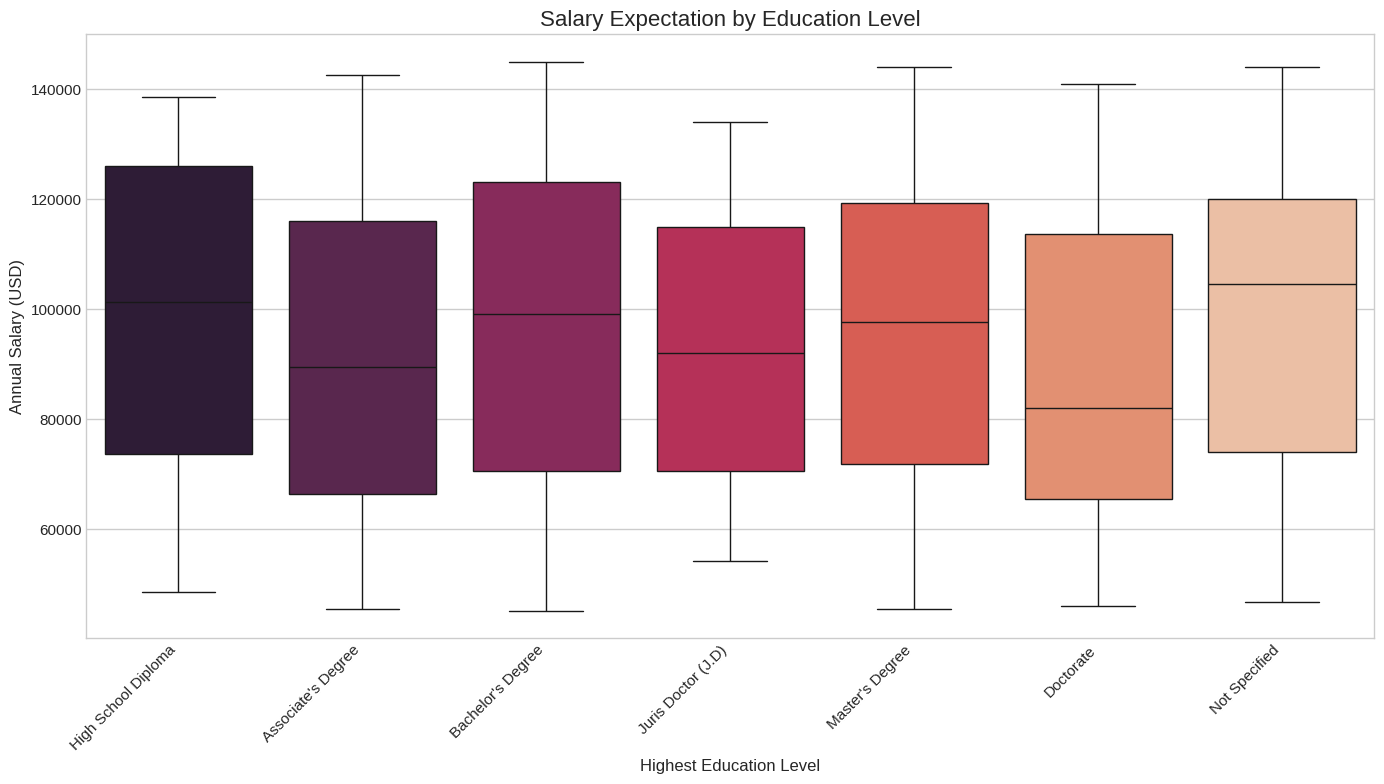

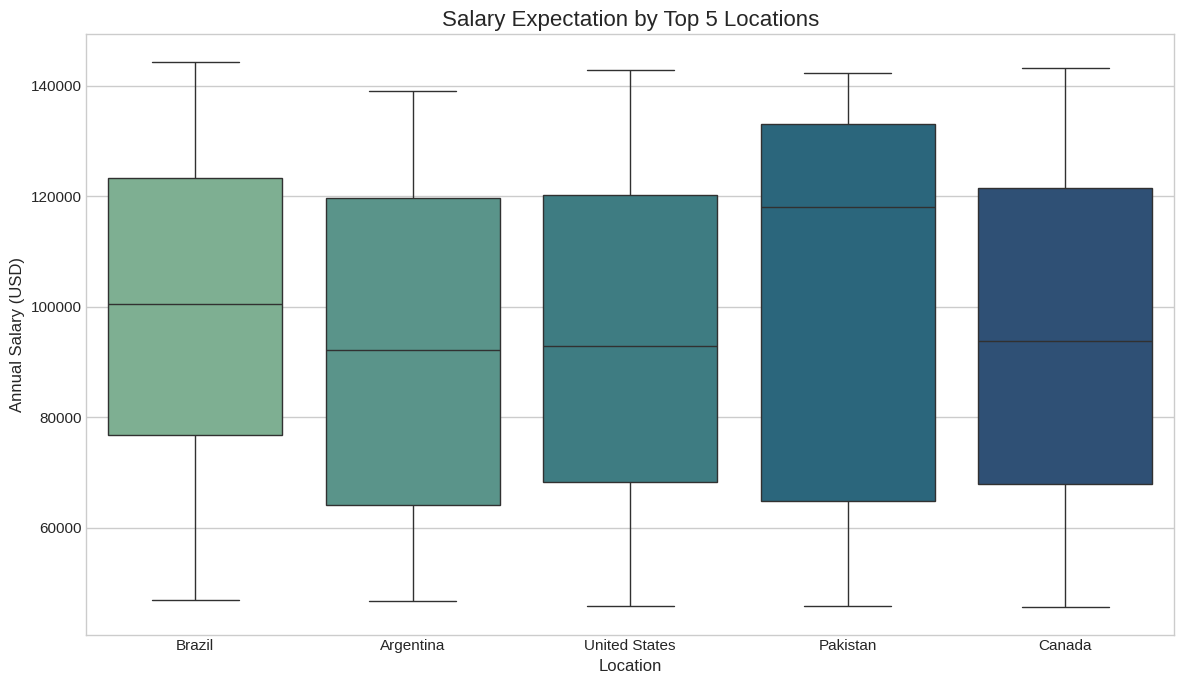

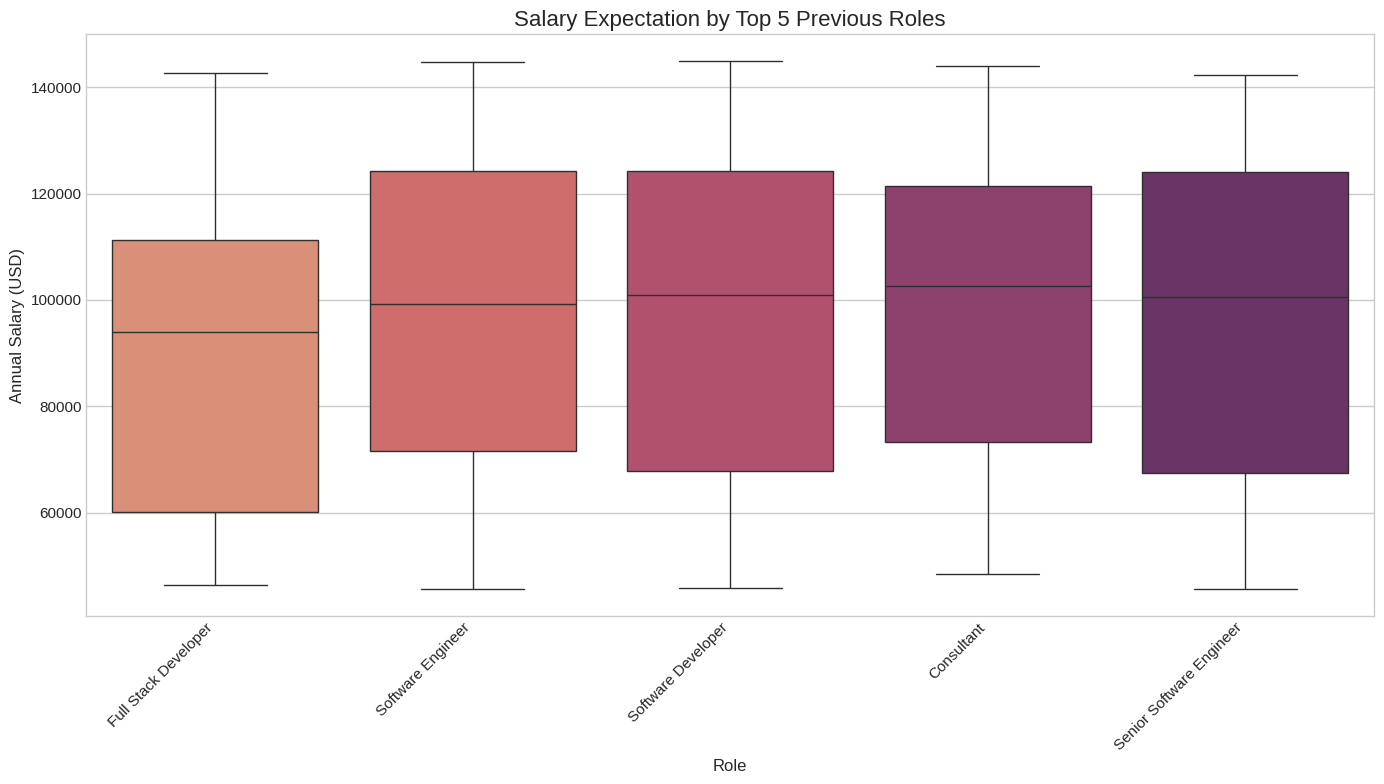

In [5]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import numpy as np

# --- Configuration ---
# Set styles for plots for better aesthetics
sns.set_theme(style="whitegrid", palette="viridis")
plt.style.use('seaborn-v0_8-whitegrid')

# --- Data Loading and Cleaning Function ---
def load_and_clean_data(filepath):
    """
    Loads candidate data from a JSON file, cleans it, and structures it into a pandas DataFrame.

    Args:
        filepath (str): The path to the form-submissions.json file.

    Returns:
        pandas.DataFrame: A cleaned and structured DataFrame of candidate data.
    """
    try:
        with open(filepath, 'r', encoding='utf-8') as f:
            data = json.load(f)
    except FileNotFoundError:
        print(f"Error: The file {filepath} was not found.")
        return pd.DataFrame()
    except json.JSONDecodeError:
        print(f"Error: The file {filepath} is not a valid JSON file.")
        return pd.DataFrame()

    # --- Data Extraction and Structuring ---
    # We will flatten the nested JSON structure to make it easier to analyze with pandas.
    processed_records = []
    for record in data:
        # Extract salary, handling missing values and converting to a number
        salary_str = record.get('annual_salary_expectation', {}).get('full-time')
        salary = None
        if salary_str:
            try:
                # Remove '$' and ',' and convert to integer
                salary = int(salary_str.replace('$', '').replace(',', ''))
            except (ValueError, TypeError):
                salary = None # Keep as None if conversion fails

        # Extract highest education level
        highest_education = record.get('education', {}).get('highest_level', 'Not Specified')
        if not highest_education: # Handle empty strings
             highest_education = 'Not Specified'

        # Extract all roles from work experience
        work_experiences = record.get('work_experiences', [])
        roles = [exp['roleName'] for exp in work_experiences if 'roleName' in exp and exp['roleName']] if work_experiences else []

        processed_records.append({
            'name': record.get('name', 'Unnamed'),
            'location': record.get('location', 'Not Specified') or 'Not Specified',
            'salary_expectation': salary,
            'highest_education': highest_education,
            'skills': record.get('skills', []),
            'roles': roles
        })

    df = pd.DataFrame(processed_records)
    # Drop rows where salary is not specified for a more accurate salary analysis
    df.dropna(subset=['salary_expectation'], inplace=True)
    df['salary_expectation'] = df['salary_expectation'].astype(int)

    return df

# --- Analysis and Visualization Functions ---

def analyze_and_visualize(df):
    """
    Performs data analysis and generates visualizations for key insights.

    Args:
        df (pandas.DataFrame): The DataFrame containing cleaned candidate data.
    """
    if df.empty:
        print("DataFrame is empty. Cannot perform analysis.")
        return

    # --- 1. Salary Analysis ---
    print("--- Salary Expectation Analysis ---")
    print(df['salary_expectation'].describe())
    print("\n")

    plt.figure(figsize=(12, 6))
    sns.histplot(df['salary_expectation'], bins=30, kde=True)
    plt.title('Distribution of Annual Salary Expectations', fontsize=16)
    plt.xlabel('Annual Salary (USD)', fontsize=12)
    plt.ylabel('Number of Candidates', fontsize=12)
    plt.tight_layout()
    plt.savefig('salary_distribution.png')
    print("Saved salary distribution plot to salary_distribution.png")

    # --- 2. Skills Analysis ---
    print("--- Top 15 Most Common Skills ---")
    all_skills = [skill for sublist in df['skills'] for skill in sublist]
    skills_counter = Counter(all_skills)
    top_skills = skills_counter.most_common(15)
    print(pd.DataFrame(top_skills, columns=['Skill', 'Count']))
    print("\n")

    plt.figure(figsize=(12, 8))
    skill_df = pd.DataFrame(top_skills, columns=['Skill', 'Count'])
    sns.barplot(x='Count', y='Skill', data=skill_df)
    plt.title('Top 15 Most Common Skills', fontsize=16)
    plt.xlabel('Number of Candidates', fontsize=12)
    plt.ylabel('Skill', fontsize=12)
    plt.tight_layout()
    plt.savefig('top_skills.png')
    print("Saved top skills plot to top_skills.png")

    # --- 3. Location Analysis ---
    print("--- Top 10 Candidate Locations ---")
    top_locations = df['location'].value_counts().nlargest(10)
    print(top_locations)
    print("\n")

    plt.figure(figsize=(12, 7))
    sns.barplot(x=top_locations.values, y=top_locations.index, palette='plasma')
    plt.title('Top 10 Candidate Locations', fontsize=16)
    plt.xlabel('Number of Candidates', fontsize=12)
    plt.ylabel('Location', fontsize=12)
    plt.tight_layout()
    plt.savefig('top_locations.png')
    print("Saved top locations plot to top_locations.png")

    # --- 4. Education Level Analysis ---
    print("--- Distribution of Education Levels ---")
    education_counts = df['highest_education'].value_counts()
    print(education_counts)
    print("\n")

    plt.figure(figsize=(12, 7))
    sns.barplot(x=education_counts.values, y=education_counts.index, palette='magma')
    plt.title('Distribution of Highest Education Levels', fontsize=16)
    plt.xlabel('Number of Candidates', fontsize=12)
    plt.ylabel('Education Level', fontsize=12)
    plt.tight_layout()
    plt.savefig('education_distribution.png')
    print("Saved education distribution plot to education_distribution.png")

    # --- 5. Role Analysis ---
    print("--- Top 15 Most Common Previous Roles ---")
    all_roles = [role for sublist in df['roles'] for role in sublist]
    roles_counter = Counter(all_roles)
    top_roles_list = [role[0] for role in roles_counter.most_common(15)]
    print(pd.DataFrame(roles_counter.most_common(15), columns=['Role', 'Count']))

    plt.figure(figsize=(12, 8))
    role_df = pd.DataFrame(roles_counter.most_common(15), columns=['Role', 'Count'])
    sns.barplot(x='Count', y='Role', data=role_df, palette='cividis')
    plt.title('Top 15 Most Common Previous Roles', fontsize=16)
    plt.xlabel('Number of Mentions', fontsize=12)
    plt.ylabel('Role', fontsize=12)
    plt.tight_layout()
    plt.savefig('top_roles.png')
    print("Saved top roles plot to top_roles.png")

    # --- 6. NEW: Education Level vs. Salary Expectation ---
    print("\n--- Salary Expectation by Education Level ---")
    education_order = [
        'High School Diploma', 'Associate\'s Degree', 'Bachelor\'s Degree',
        'Juris Doctor (J.D)', 'Master\'s Degree', 'Doctorate', 'Not Specified'
    ]
    plt.figure(figsize=(14, 8))
    sns.boxplot(x='highest_education', y='salary_expectation', data=df, palette='rocket', order=education_order)
    plt.title('Salary Expectation by Education Level', fontsize=16)
    plt.xlabel('Highest Education Level', fontsize=12)
    plt.ylabel('Annual Salary (USD)', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig('salary_by_education.png')
    print("Saved salary by education plot to salary_by_education.png")

    # --- 7. NEW: Salary Expectation by Top 5 Locations ---
    print("\n--- Salary Expectation by Top 5 Locations ---")
    top_5_locations = top_locations.index[:5].tolist()
    df_top_locations = df[df['location'].isin(top_5_locations)]
    plt.figure(figsize=(12, 7))
    sns.boxplot(x='location', y='salary_expectation', data=df_top_locations, palette='crest')
    plt.title('Salary Expectation by Top 5 Locations', fontsize=16)
    plt.xlabel('Location', fontsize=12)
    plt.ylabel('Annual Salary (USD)', fontsize=12)
    plt.tight_layout()
    plt.savefig('salary_by_location.png')
    print("Saved salary by location plot to salary_by_location.png")

    # --- 8. NEW: Salary Expectation by Top 5 Roles ---
    print("\n--- Salary Expectation by Top 5 Roles ---")
    df_roles_exploded = df.explode('roles')
    top_5_roles = top_roles_list[:5]
    df_top_roles = df_roles_exploded[df_roles_exploded['roles'].isin(top_5_roles)]

    plt.figure(figsize=(14, 8))
    sns.boxplot(x='roles', y='salary_expectation', data=df_top_roles, palette='flare')
    plt.title('Salary Expectation by Top 5 Previous Roles', fontsize=16)
    plt.xlabel('Role', fontsize=12)
    plt.ylabel('Annual Salary (USD)', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig('salary_by_role.png')
    print("Saved salary by role plot to salary_by_role.png")

# --- Main Execution Block ---
if __name__ == "__main__":
    FILE_PATH = 'form-submissions.json'
    candidate_df = load_and_clean_data(FILE_PATH)

    if not candidate_df.empty:
        analyze_and_visualize(candidate_df)
        # Show all plots at the end
        print("\nDisplaying all generated plots...")
        plt.show()

